In [61]:
import numpy as np
import time
from matplotlib import pyplot as plt

In [62]:
def make_them_powers(a,b):
    # возвращает две матрицы 2**n x 2**n с минимальным n: они содержат в себе матрицы A и B, остальные элементы - нули
    
    assert(a.shape[1]==b.shape[0])
    
    max_n = np.max([*a.shape,*b.shape])
    
    n = np.int32(2**(np.ceil(np.log2(max_n))))
    
    new_a = np.zeros((n,n))
    new_b = np.zeros((n,n))
    
    new_a[:a.shape[0],:a.shape[1]] = a
    new_b[:b.shape[0],:b.shape[1]] = b
    
    return new_a, new_b

In [63]:
def strassen(a,b):
    
    initial_shapes = [a.shape[0], a.shape[1], b.shape[0], b.shape[1]]
    
    if not ((len(set(initial_shapes))) and (np.log2(a.shape[0])%1==0)):
        a,b = make_them_powers(a,b)
    
    n = a.shape[0]
    
    if n == 1:
        return a*b
    
    m = n//2 # размер подматрицы
        
    a11 = a[:m,:m]
    a12 = a[:m,m:]
    a21 = a[m:,:m]
    a22 = a[m:,m:]
    
    b11 = b[:m,:m]
    b12 = b[:m,m:]
    b21 = b[m:,:m]
    b22 = b[m:,m:]
    
    p1 = strassen(a11+a22,b11+b22)
    p2 = strassen(a21+a22,b11)
    p3 = strassen(a11,b12-b22)
    p4 = strassen(a22,b21-b11)
    p5 = strassen(a11+a12,b22)
    p6 = strassen(a21-a11,b11+b12)
    p7 = strassen(a12-a22,b21+b22)
    
    c11 = p1 + p4 - p5 + p7
    c12 = p3 + p5
    c21 = p2 + p4
    c22 = p1 - p2 + p3 + p6
    
    c = np.zeros((n,n))
    
    c[:m,:m] = c11
    c[:m,m:] = c12
    c[m:,:m] = c21
    c[m:,m:] = c22
    
    return c[:initial_shapes[0],:initial_shapes[3]] # return matrix of original size

In [64]:
def recursive(a,b):
    
    initial_shapes = [a.shape[0], a.shape[1], b.shape[0], b.shape[1]]
    
    if not ((len(set(initial_shapes))) and (np.log2(a.shape[0])%1==0)):
        a,b = make_them_powers(a,b)
    
    n = a.shape[0]
    
    if n == 1:
        return a*b
    
    m = n//2 # размер подматрицы
        
    a11 = a[:m,:m]
    a12 = a[:m,m:]
    a21 = a[m:,:m]
    a22 = a[m:,m:]
    
    b11 = b[:m,:m]
    b12 = b[:m,m:]
    b21 = b[m:,:m]
    b22 = b[m:,m:]
    
    c11 = recursive(a11,b11) + recursive(a12,b21)
    c12 = recursive(a11,b12) + recursive(a12,b22)
    c21 = recursive(a21,b11) + recursive(a22,b21)
    c22 = recursive(a21,b12) + recursive(a22,b22)
    
    c = np.zeros((n,n))
    
    c[:m,:m] = c11
    c[:m,m:] = c12
    c[m:,:m] = c21
    c[m:,m:] = c22
    
    return c[:initial_shapes[0],:initial_shapes[3]] # return matrix of original size

In [65]:
a = np.random.rand(3,2)
b = np.random.rand(2,3)

In [66]:
a@b

array([[0.74352517, 1.10206246, 0.87146471],
       [0.99586409, 1.13130951, 0.72106813],
       [0.89191891, 0.989397  , 0.61496795]])

In [67]:
strassen(a,b)

array([[0.74352517, 1.10206246, 0.87146471],
       [0.99586409, 1.13130951, 0.72106813],
       [0.89191891, 0.989397  , 0.61496795]])

In [68]:
recursive(a,b)

array([[0.74352517, 1.10206246, 0.87146471],
       [0.99586409, 1.13130951, 0.72106813],
       [0.89191891, 0.989397  , 0.61496795]])

In [93]:
N = 6 # number of samples to average over
strassen_times = []
recursive_times = []
diff = []
for i in range(1,N):
    
    total_time_strassen = 0
    total_time_recursive = 0
    
    total_diff = 0
    
    for j in range(N):
        rand_a = np.random.rand(2**i,2**i)
        rand_b = np.random.rand(2**i,2**i)
        
        start = time.time()
        prod1 = strassen(rand_a,rand_b)
        end = time.time()
        total_time_strassen+=end-start
        
        start = time.time()
        prod2 = recursive(rand_a, rand_b)
        end = time.time()
        total_time_recursive+=end-start
        
        total_diff += np.sum((prod1-prod2)**2)
        
    print(2**i,'x',2**i,'done')
    strassen_times.append(total_time_strassen)
    recursive_times.append(total_time_recursive)
    diff.append(total_diff)

2 x 2 done
4 x 4 done
8 x 8 done
16 x 16 done
32 x 32 done


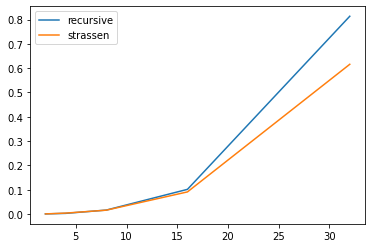

In [94]:
plt.plot(2**np.arange(1,6),recursive_times)
plt.plot(2**np.arange(1,6),strassen_times)
plt.legend(['recursive','strassen'])

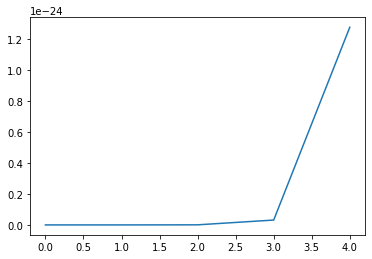

In [95]:
plt.plot(diff)